<a href="https://colab.research.google.com/github/kgovindaraju123/AIML/blob/master/Copy_of_Keras_Multiclass_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KERAS MULTICLASS CLASSIFICATION

Keras has a few requirements:

    You have Python 2 or 3 installed and configured.
    You have SciPy (including NumPy) installed and configured.
    You have Keras and a backend (Theano or TensorFlow) installed and configured.


Keras is a popular library for deep learning in Python, but the focus of the library is deep learning. In fact it strives for minimalism, focusing on only what you need to quickly and simply define and build deep learning models.



The scikit-learn library in Python is built upon the SciPy stack for efficient numerical computation. It is a fully featured library for general machine learning and provides many utilities that are useful in the development of deep learning models. Not least:

Evaluation of models using resampling methods like k-fold cross validation.    Efficient search and evaluation of model hyper-parameters.

The Keras library provides a convenient wrapper for deep learning models to be used as classification or regression estimators in scikit-learn.

Problem Description

---
we will use the standard machine learning problem called the iris flowers dataset.

This dataset is well studied and is a good problem for practicing on neural networks because all of the 4 input variables are numeric and have the same scale in centimeters. Each instance describes the properties of an observed flower measurements and the output variable is specific iris species.

This is a multi-class classification problem, meaning that there are more than two classes to be predicted, in fact there are three flower species. This is an important type of problem on which to practice with neural networks because the three class values require specialized handling.

The iris flower dataset is a well-studied problem and a such we can expect to achieve a model accuracy in the range of 95% to 97%. This provides a good target to aim for when developing our models.


In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import  np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


Data Preparation and Model Evaluation using SKLEARN

Load the Dataset

---
The dataset can be loaded directly. Because the output variable contains strings, it is easiest to load the data using pandas. We can then split the attributes (columns) into input variables (X) and output variables (Y).


In [2]:
dataframe = pandas.read_csv("iris.data", header=None)
dataframe[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [4]:
Y.shape

(150,)

Encode the Output Variable

---
The output variable contains three different string values.

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

This is called one hot encoding or creating dummy variables from a categorical variable.

For example, in this problem three class values are Iris-setosa, Iris-versicolor and Iris-virginica. If we had the observations:


We can turn this into a one-hot encoded binary matrix for each data instance that would look as follows:
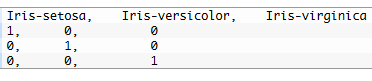

In [0]:

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [0]:
encoded_Y.shape

(150,)

np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector. 

In [0]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [0]:
dummy_y.shape

(150, 3)

Define the Neural Network Model:
The Keras library provides wrapper classes to allow you to use neural network models developed with Keras in scikit-learn.

There is a KerasClassifier class in Keras that can be used as an Estimator in scikit-learn, the base type of model in the library. The KerasClassifier takes the name of a function as an argument. This function must return the constructed neural network model, ready for training.

Below is a function that will create a baseline neural network for the iris classification problem. It creates a simple fully connected network with one hidden layer that contains 8 neurons.

The hidden layer uses a rectifier activation function which is a good practice. Because we used a one-hot encoding for our iris dataset, the output layer must create 3 output values, one for each class. The output value with the largest value will be taken as the class predicted by the model.

The network topology of this simple one-layer neural network can be summarized as:

 	
4 inputs -> [8 hidden nodes] -> 3 outputs
---



Note that we use a “softmax” activation function in the output layer. This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.

Finally, the network uses the efficient Adam gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.

In [0]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

We can now create our KerasClassifier for use in scikit-learn.

We can also pass arguments in the construction of the KerasClassifier class that will be passed on to the fit() function internally used to train the neural network. Here, we pass the number of epochs as 200 and batch size as 5 to use when training the model. Debugging is also turned off when training by setting verbose to 0.

Evaluate The Model with k-Fold Cross Validation

We can now evaluate the neural network model on our training data.

The scikit-learn has excellent capability to evaluate models using a suite of techniques. The gold standard for evaluating machine learning models is k-fold cross validation.

First we can define the model evaluation procedure. Here, we set the number of folds to be 10 (an excellent default) and to shuffle the data before partitioning it.

Keras with Multi-Class Classificatino Example

In [11]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset
dataframe = pandas.read_csv("iris.data", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
 
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: nan% (nan%)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
RuntimeError: It looks like you are trying to use a version of multi-backend Keras that does not support TensorFlow 2.0. We recommend using `tf.keras`, or alternatively, downgrading to TensorFlow 1.14.

  FitFailedWarning)
